### Импорт библиотек

In [20]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, auc
from sklearn import model_selection

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

### Загрузка данных

In [23]:
sampleEntry = pd.read_csv('sampleEntry.csv')
train = pd.read_csv('cs-training.csv')
test = pd.read_csv('cs-test.csv')

In [24]:
train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [26]:
train = train.dropna().drop(columns= ['Unnamed: 0'])
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Описание столбцов

- **SeriousDlqin2yrs** Человек с просрочкой на 90 дней или хуже

- **RevolvingUtilizationOfUnsecuredLines** Общий остаток по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по рассрочке, такой как автокредиты, деленная на сумму процентов кредитных лимитов
- **age** Возраст заемщика в годах
- **NumberOfTime3059DaysPastDueNotWorse** Количество раз, когда заемщик просрочил срок на 30-59 дней, но не хуже за последние 2 года
- **DebtRatio** Ежемесячные платежи по долгу, алименты и расходы на проживание, разделенные на процент месячного валового дохода
- **NumberOfOpenCreditLinesAndLoans** Количество открытых кредитов (в рассрочку, автокредит или ипотека) и кредитные линии
- **NumberOfTimes90DaysLate** Количество раз, когда заемщик просрочил на 90 дней или более
- **NumberRealEstateLoansOrLines** Количество ипотечных кредитов и кредитов на недвижимость, включая кредитные линии
- **NumberOfTime60-89DaysPastDueNotWorse** Количество раз, когда заемщик просрочил срок на 60-89 дней, но не хуже за последние 2 года
- **NumberOfDependents** Количество родственников на попечении в семье, исключая себя (супруг, детей и т. д.)

Целевым столбцом является SeriousDlqin2yrs

In [27]:
X_train = train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = train['SeriousDlqin2yrs']

### Важность признаков

Для вычисления важности признаков будем использовать случайный лес 

In [30]:
feature_names = X_train.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

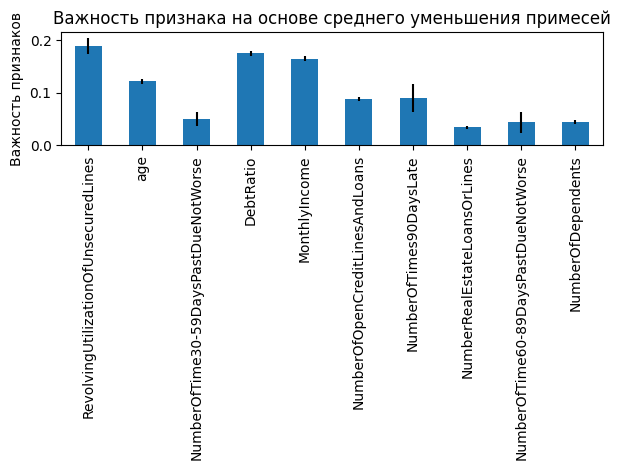

In [42]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Важность признака на основе среднего уменьшения примесей")
ax.set_ylabel("Важность признаков")
fig.tight_layout()

### Визуальный анализ 

In [45]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Поскольку наибольшее стандартное отклониние std у DebtRatio и MonthlyIncome, построим для них boxplot и отсечем выбросы 

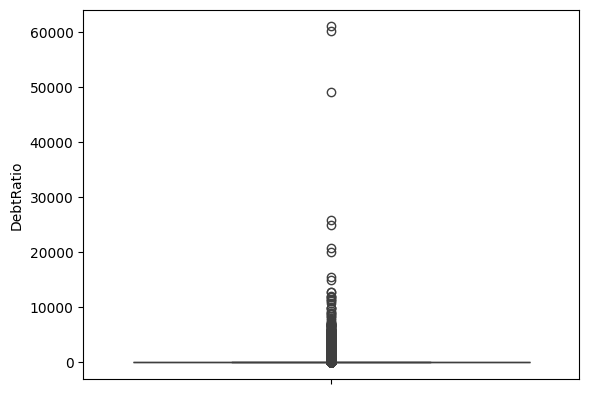

In [36]:
sns.boxplot(train['DebtRatio'])
plt.show()

<Axes: >

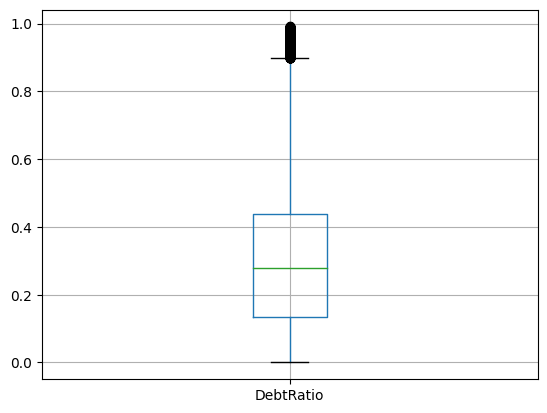

In [51]:
Q1 =  train['DebtRatio'].quantile(0.25)
Q3 = train['DebtRatio'].quantile(0.75)
IQR = Q3 - Q1

train.query("@Q1 - 1.5*@IQR < DebtRatio < @Q3 + 1.5*@IQR").boxplot(column="DebtRatio")

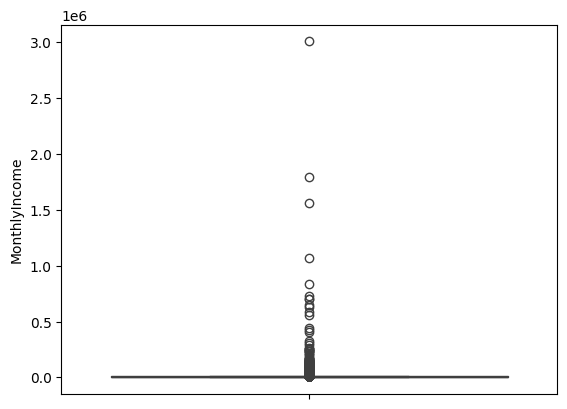

In [52]:
sns.boxplot(train['MonthlyIncome'])
plt.show()

<Axes: >

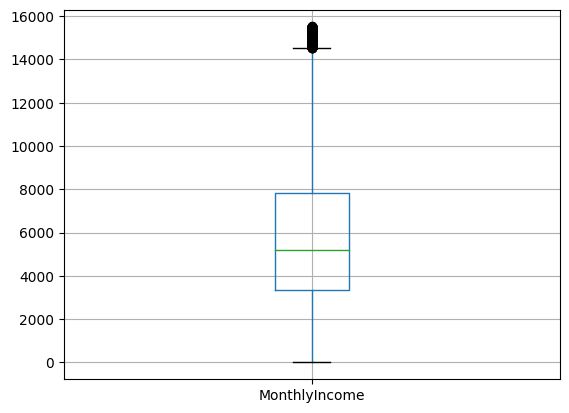

In [53]:
Q1 =  train['MonthlyIncome'].quantile(0.25)
Q3 = train['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

train.query("@Q1 - 1.5*@IQR < MonthlyIncome < @Q3 + 1.5*@IQR").boxplot(column="MonthlyIncome")

##### Поиск дисбаланса классов в целевом столбце 

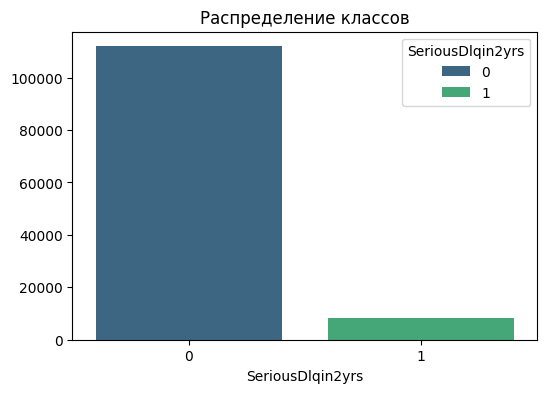

In [105]:
class_counts = train['SeriousDlqin2yrs'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', hue=class_counts.index)
plt.title('Распределение классов')
plt.show()

Как видно на графике, количество объектов с классом 0 существенно больше, чем с классом 1

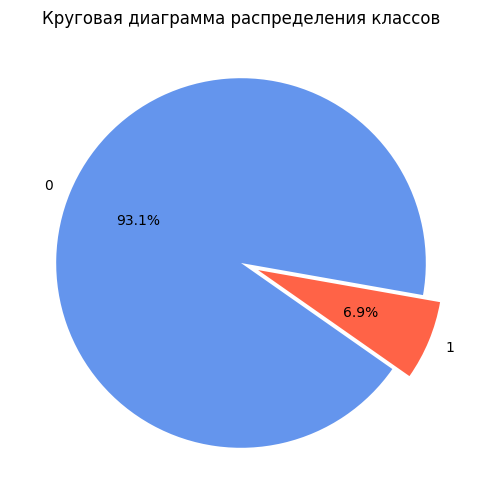

In [116]:
explode = (0, 0.1)
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['0', '1'], explode=explode, autopct='%1.1f%%', colors=['cornflowerblue', 'tomato'], startangle=-10)
plt.title('Круговая диаграмма распределения классов')
plt.show()

### Логистическая регрессия

In [97]:
y = train['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(train.drop(['SeriousDlqin2yrs'], axis=1), y, train_size=0.1, random_state=44)

lr = LogisticRegression(max_iter=300, solver='newton-cg')
lr.fit(X_train,y_train)
prob = lr.predict_proba(X_test)

roc = roc_auc_score(y_test, prob[:,1])
print('roc ',roc)

roc  0.6858909196806344


Test: 


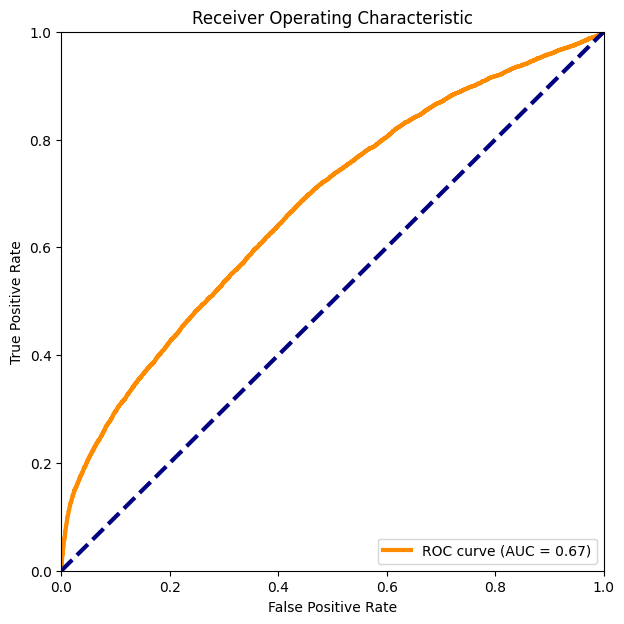

In [63]:
fpr, tpr, threshold = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7,7))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc) #lw - толщина линии
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') #прямая y=x
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
print("Test: ")
plt.show()

### Случайный лес

In [72]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
predictionrf = rf.predict_proba(X_test)[:, 1]

rocrf = roc_auc_score(y_test, predictionrf)
print('roc ',rocrf)

roc  0.8270213655202288


Test: 


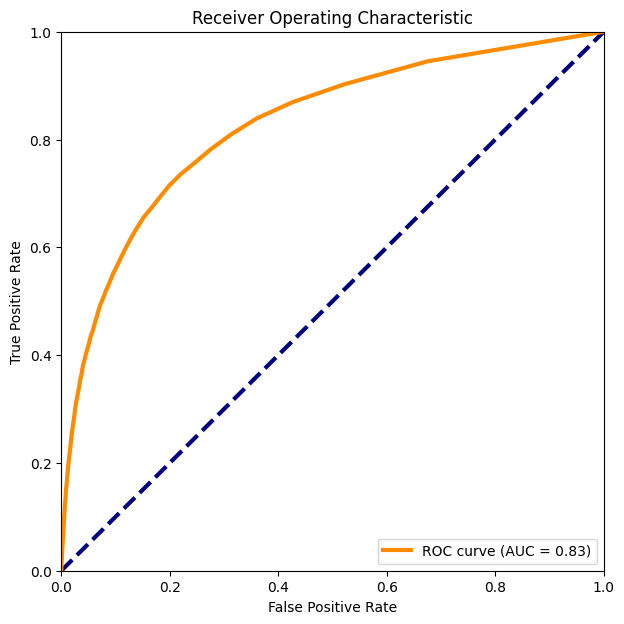

In [73]:
fpr, tpr, threshold = roc_curve(y_test, predictionrf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7,7))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') #прямая y=x
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc) #lw - толщина линии
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
print("Test: ")
plt.show()

In [75]:
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='roc_auc')

print('RF ', cross_val_scores)

RF  [0.8463017  0.82716636 0.82115065 0.83968811]


### Grid Search CV

In [76]:
param_grid = {
    'n_estimators' : [50, 80, 100, 120, 150, 200]
}

rf_CV = GridSearchCV(rf, param_grid=param_grid, scoring='roc_auc', verbose=2)
rf_CV.fit(X_train, y_train)

best_parameters = rf_CV.best_params_
print("The best parameters: ", best_parameters)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................n_estimators=50; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   0.4s
[CV] END ....................................n_estimators=80; total time=   0.7s
[CV] END ....................................n_estimators=80; total time=   0.7s
[CV] END ....................................n_estimators=80; total time=   0.7s
[CV] END ....................................n_estimators=80; total time=   0.7s
[CV] END ....................................n_estimators=80; total time=   0.7s
[CV] END ...................................n_estimators=100; total time=   0.9s
[CV] END ...................................n_est

In [120]:
rf = RandomForestClassifier(n_estimators=150).fit(X_train, y_train)
predictionrf = rf.predict_proba(X_test)[:, 1]

rocrf = roc_auc_score(y_test, predictionrf)
print('roc ',rocrf)

roc  0.8301589950421011
